<a href="https://colab.research.google.com/github/wakamatsuikuma/Essence-of-Machine-Learning-1st-Editon/blob/main/4%E7%AB%A0_%E6%95%B0%E7%90%86%E6%9C%80%E9%81%A9%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形計画問題と二次計画法



制約条件ありでの１次元および2次元関数の最適化

In [ ]:
import numpy as np
from scipy import optimize

c = np.array([-3, -4], dtype=np.float64)
G = np.array([[1, 4], [2, 3], [2, 1]], dtype=np.float64)
h = np.array([1700, 1400, 1000], np.float64)
sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None))

print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688583


In [ ]:
import numpy as np
import cvxopt

P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q)

print(list(sol.keys()))
#print(list(sol.values()))

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))


['status', 'x', 'y', 'z', 's', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal slack', 'dual slack', 'primal infeasibility', 'dual infeasibility', 'iterations']
[[ 1.57009246e-16]
 [-2.00000000e+00]]
-4.0


In [ ]:
import numpy as np
import cvxopt

P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))
A = cvxopt.matrix(np.array([[1, 1]], dtype=np.float64))
b = cvxopt.matrix(np.array([0], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, A=A, b=b)

print(list(sol.keys()))
#print(list(sol.values()))

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))


['status', 'x', 'y', 'z', 's', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal slack', 'dual slack', 'primal infeasibility', 'dual infeasibility', 'iterations']
[[ 1.]
 [-1.]]
-1.0000000000000013


In [ ]:
import numpy as np
import cvxopt

P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))
G = cvxopt.matrix(np.array([[2, 3]], dtype=np.float64))
h = cvxopt.matrix(np.array([3], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, G=G, h=h)

print(list(sol.keys()))
#print(list(sol.values()))

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))


     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations']
[[-2.45940165e-09]
 [-2.00000001e+00]]
-4.0


# 勾配降下法

制約条件なしでの多次元関数の最適化

In [ ]:
# 勾配降下法の実装

import numpy as np

# まず最小化したい関数と導関数を指定
class GradientDescent:
    
    def __init__(self, f, df, alpha=0.01, eps = 1e-6):
        
        # alphaとepsは与えておく
        
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None 
    
    
    def solve(self, init):
        
        # 計算の準備
        x = init # 開始の点は引数で与える
        path = []
        path.append(x) # 描画用に通った変数は保存しておく
        grad = self.df(x) # その・での勾配ベクトルの計算
        
        # アルゴリズムの表現：勾配ベクトルのノルムL2がε以下になるまで、勾配降下法で点を移動する。
        while (grad ** 2).sum()>self.eps ** 2:
            x = x - self.alpha * grad # 次の点を計算
            grad = self.df(x) # 移動後の点での勾配を計算
            path.append(x) # 移動後の点をリストに保存
        
        # 勾配降下法計算後の　点の通り道、最適解、最適値を保存
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = f(x)


[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


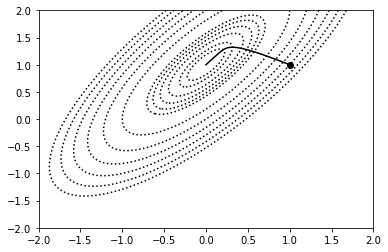

In [ ]:
#5x^2-6xy+3y^2+6x-6yの最小値の計算

import matplotlib.pyplot as plt

#1. 最適化したい関数とその導関数を定義

# 最適化したい関数。引数はもちろん、2変数（ndarray型/第一引数x、第二引数yで格納）。
def f(xx):
    x = xx[0]
    y = xx[1]
    
    return 5 * (x**2) - 6 * x * y + 3 * (y**2) + 6 * x - 6 * y

# 導関数。引数はもちろん、2変数ndarray型/第一引数x、第二引数yで格納）。
def df(xx):
    x = xx[0]
    y = xx[1]
    
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])



#2. 実装したクラスで最適化の計算
algo = GradientDescent(f, df)#まずは実装したクラスのインスタンス作成。引数には上で定義した引数無し関数を指定。
initial = np.array([1, 1]) #初期値を(x, y)=(1, 1)とする
algo.solve(initial) #初期値initialを引数として実装した勾配降下法を実行
print(algo.x_)
print(algo.opt_)



#3. 収束する様子を描画

#始点
plt.scatter(initial[0], initial[1], color = 'k', marker = 'o')

#最適値に収束するまでの通り道
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color = 'k', linewidth = 1.5)

#最適化したい関数の等高線
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys) #任意のx座標およびy座標における関数の値を評価するためのグリッドを示す配列を作成

xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
z = f(xx).reshape(xmesh.shape) # 最適化したい関数の各座標における値を計算し、2次元配列に。

levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]# 等高線として表示する関数値を指定
plt.contour(xs, ys, z, levels = levels, colors = 'k', linestyles = 'dotted')

plt.show()


# ニュートン法

制約条件なしでの多次元関数が0になる方程式の数値的解法

1次元の場合

In [ ]:
# x^3 - 5x + 1 = 0 を求める

# ニュートン法の実装
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
  # 解を求めたい関数f, その導関数, 変数の初期値、収束条件に使うε, 無限ループする可能性を見越した最大繰り返し回数max_iter を引数とする。
  x = x0
  iter = 0

  while True:
    x_new = x - f(x)/df(x) #傾きから得られる次の変数
    # 条件式の終了条件/収束条件
    if abs(x-x_new) < eps:
      break
    # 変数の更新と繰り返し数の記録
    x = x_new
    iter += 1
    # 条件式の終了条件/繰り返し数による
    if iter == max_iter:
      break
    
    return x_new

# 解を求めたい関数f
def f(x):
  return x**3 - 5*x + 1

# その導関数
def df(x):
  return 3*x**2 - 5

# 実装したニュートン法の実行
print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))

2.142857142857143
0.2
-2.5


多次元の場合

In [ ]:
#ニュートン法の実装

import numpy as np
from numpy import linalg


class Newton:
#初期値の設定
  def __init__ (self, f, df, eps=1e-10, max_iter=1000):
    self.f = f
    self.df = df
    self.eps = eps
    self.max_iter = max_iter

#ニュートン法のアルゴリズム
  def solve(self, x0):
    x = x0
    iter = 0
    self.path_ = x0.reshape(1, -1)

    while True:
      x_new = x - np.dot(linalg.inv(self.df(x)), self.f(x)) # xの更新式。導関数の逆行列と関数の内積をnp.dotで計算
      self.path_ = np.r_[self.path_, x_new.reshape(1, -1)] # 描画用のプロット
      if ((x_new - x)**2).sum() < self.eps*self.eps :# 収束条件て一次元は絶対値、2次元以上は二乗で示してるイメージ
        break
      x = x_new
      iter += iter # 変数の更新と繰り返し数の記録
      if iter == self.max_iter: # 条件式の終了条件/繰り返し数による
        break
    return x_new

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


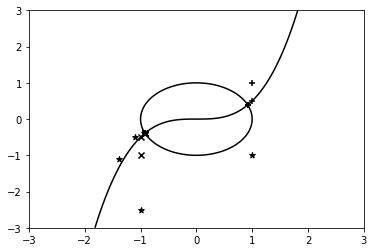

In [ ]:
# x^3 - 2y = 0, x^2 + y^2 - 1 = 0の連立方程式を解く
import numpy as np
import matplotlib.pyplot as plt

#一つ目の関数値
def f1(x, y):
  return x**3 - 2 * y

#二つ目の関数値
def f2(x, y):
  return x**2 + y**2 - 1

#上の二つの関数値をまとめて配列にする
def f(xx):
  x = xx[0]
  y = xx[1]
  return np.array([f1(x, y), f2(x, y)])

#導関数
def df(xx):
  x = xx[0]
  y = xx[1]
  return np.array([[3*x**2, -2], [2*x, 2*y]])

#等高線の作成
xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors="k", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="K", levels=[0])
#インスタンスの生成
solver = Newton(f, df)

#初期値と散布図プロット（収束の軌跡）の柄の指定
initial =[np.array([1, 1]),
        np.array([1, -1]),
        np.array([-1, -1])]
markers = ['+', '*', 'x']

#ニュートン法の実行　と　軌跡のプロット
for x0, m in zip(initial, markers):
  sol = solver.solve(x0)
  print(sol)
  plt.scatter(solver.path_[:, 0],solver.path_[:, 1], color="k", marker=m)

plt.show()



# 統計